In [1]:
import sys
import warnings
if '../' not in sys.path:
    sys.path.append('../')

warnings.filterwarnings("ignore")

In [2]:
import src.utils as ut

In [3]:
conf = ut.get_conf()

### Partial Dependance plot


In [31]:
import numpy as np
import pandas as pd
import eli5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from eli5.sklearn import PermutationImportance

In [5]:
data = ut.read_csv_file(conf['save_paths']['fifa_data'], 'FIFA 2018 Statistics')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [6]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

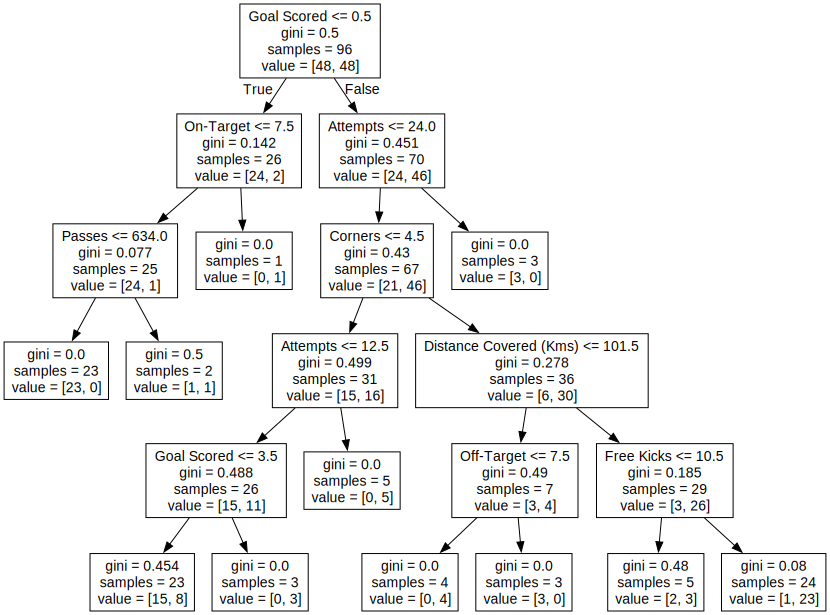

In [7]:
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

### Partial Dependance plot

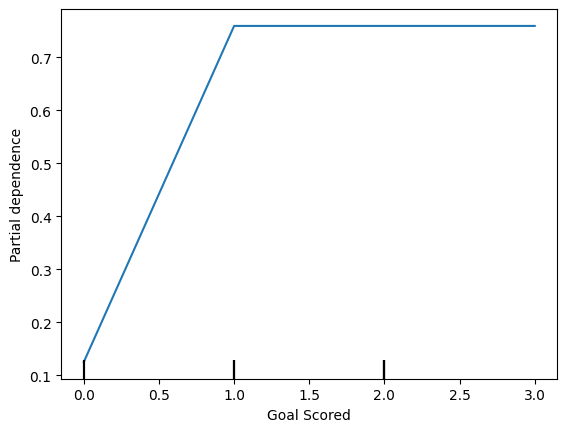

In [8]:
# Create and plot the data
disp1 = PartialDependenceDisplay.from_estimator(tree_model, val_X, ['Goal Scored'])
plt.show()

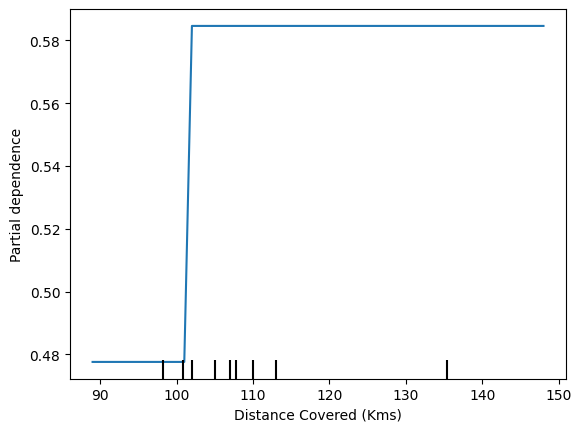

In [9]:
feature_to_plot = 'Distance Covered (Kms)'
disp2 = PartialDependenceDisplay.from_estimator(tree_model, val_X, [feature_to_plot])
plt.show()

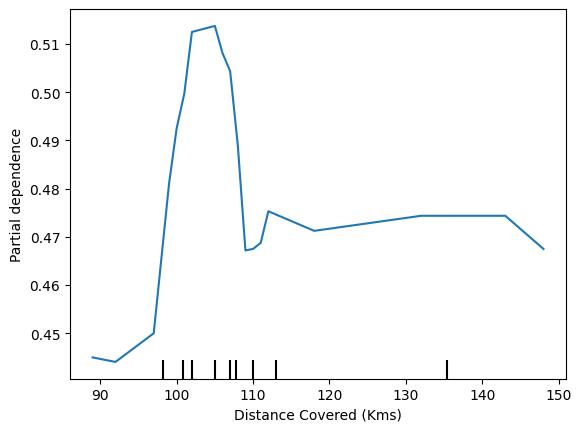

In [10]:
# For Random Forest model
disp3 = PartialDependenceDisplay.from_estimator(rf_model, val_X, [feature_to_plot])
plt.show()

2D Partial dependance Plots

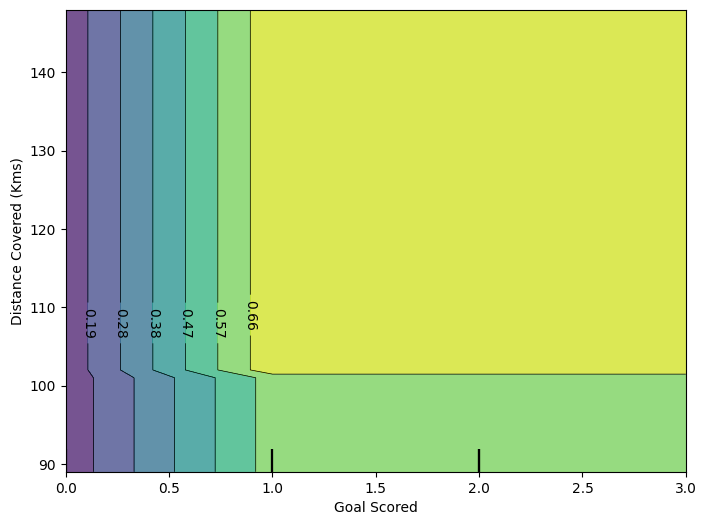

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Goal Scored', 'Distance Covered (Kms)')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(tree_model, val_X, f_names, ax=ax)
plt.show()

In [12]:
taxi_data = ut.read_csv_file_with_rows(conf['save_paths']['taxi_data'], 'train', 50000)

In [13]:
taxi_data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [14]:
# Remove data with extreme outlier coordinates or negative fares
taxi_data = taxi_data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

In [15]:
# Define the target variable
y = taxi_data.fare_amount

In [16]:
# Define base features
base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

In [17]:
X = taxi_data[base_features]

In [18]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)
print("Data sample:")
taxi_data.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [19]:
taxi_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,8.483093,-73.976860,40.756917,-73.975342,40.757473,1.656141
std,4.628164,0.014635,0.018170,0.015917,0.018661,1.284899
min,0.010000,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,5.500000,-73.988039,40.744947,-73.987125,40.745922,1.000000
50%,7.500000,-73.979691,40.758027,-73.978547,40.758559,1.000000
75%,10.100000,-73.967823,40.769580,-73.966435,40.770427,2.000000
max,165.000000,-73.900062,40.799952,-73.900062,40.799999,6.000000


In [20]:
val_X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
8494,-73.969030,40.754242,-73.981155,40.741227
36780,-73.975720,40.740650,-73.971070,40.793100
28200,-73.979424,40.747162,-73.980545,40.765682
31189,-73.982255,40.776455,-73.984172,40.770137
31359,-73.978441,40.785829,-73.978650,40.789373
...,...,...,...,...
40651,-73.988333,40.737408,-73.987815,40.721223
40536,-73.992832,40.737365,-73.991235,40.748905
6587,-73.998512,40.745012,-73.979422,40.781785
18920,-73.952263,40.772812,-73.975418,40.752380


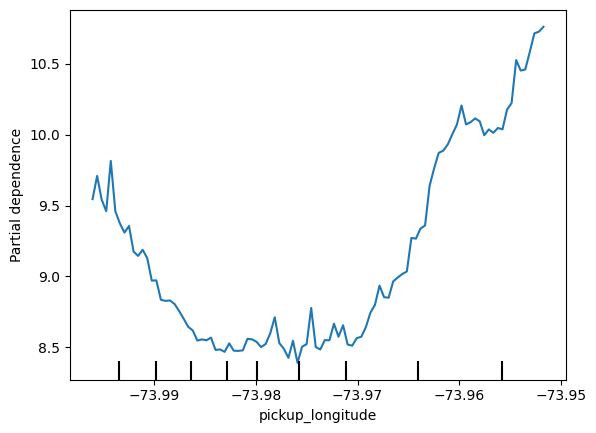

In [21]:
# Partial dependance plot for pickup_longitude
feat_name = 'pickup_longitude'
PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
plt.show()

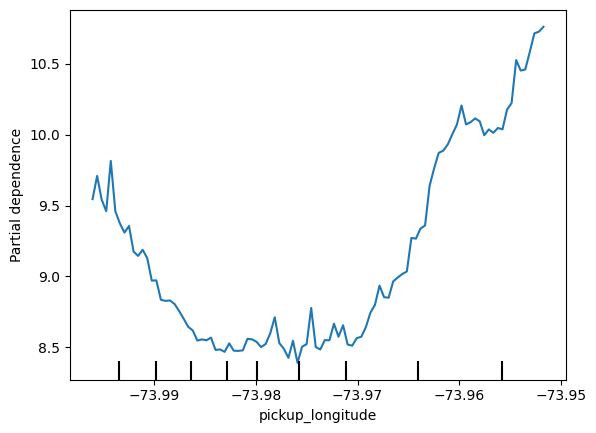

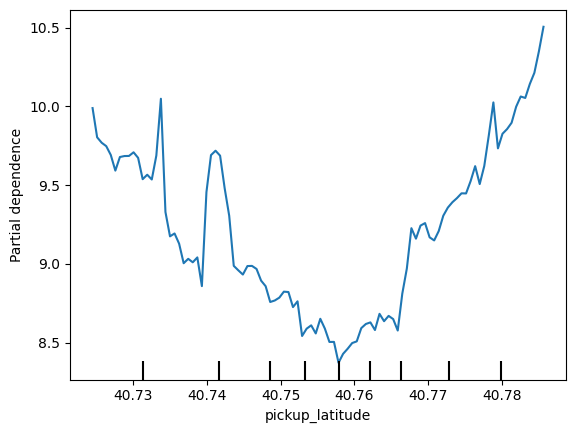

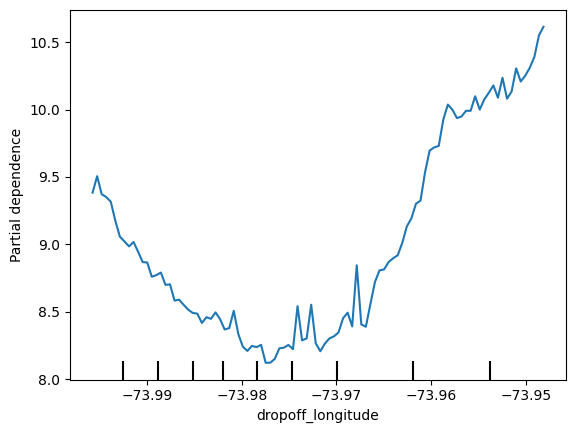

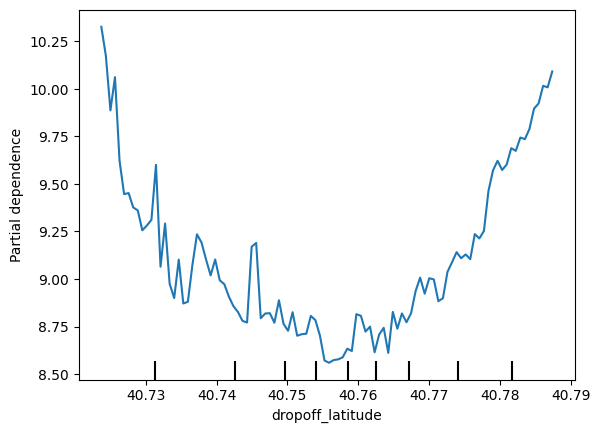

In [22]:
# Plotting Partial Dependancy Plots for all the features
for feat_name in base_features:
    plt.show(PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name]))

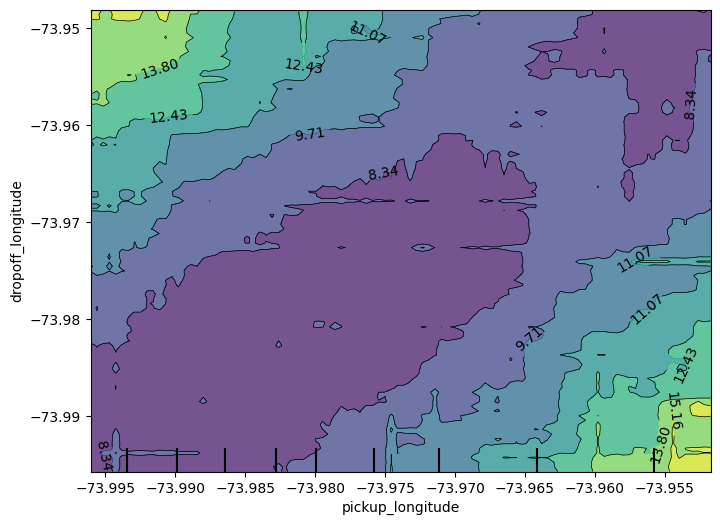

In [23]:
# 2D plot for 'pickup_longitude' and 'dropoff_longitude'
fig, ax = plt.subplots(figsize=(8, 6))

f_names = [('pickup_longitude', 'dropoff_longitude')]
PartialDependenceDisplay.from_estimator(first_model, val_X, f_names, ax=ax)
plt.show()

The plot have contours running along a diagonal. We see that to some extent, though there are interesting caveats.

We expect the diagonal contours because these are pairs of values where the pickup and dropoff longitudes are nearby, indicating shorter trips (controlling for other factors).

As you get further from the central diagonal, we should expect prices to increase as the distances between the pickup and dropoff longitudes also increase.

The surprising feature is that prices increase as you go further to the upper-right of this graph, even staying near that 45-degree line.

This could be worth further investigation, though the effect of moving to the upper right of this graph is small compared to moving away from that 45-degree line.

**Q: Consider a ride starting at longitude -73.955 and ending at longitude -74. Using the graph from the last question, estimate how much money the rider would have saved if they'd started the ride at longitude -73.98 instead.**

Sol: First find the vertical level corresponding to -74 dropoff longitude. Then read off the horizontal values you are switching between. Use the contour lines to orient yourself on what values you are near. You can round to the nearest integer rather than stressing about the exact cost to the nearest penny

In [24]:
savings_from_shorter_trip = 15-9
print(savings_from_shorter_trip)

6


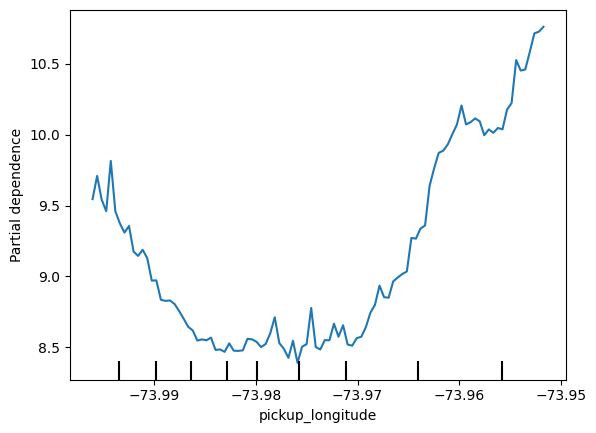

In [25]:
# This is the PDP for pickup_longitude without the absolute difference features. Included here to help compare it to the new PDP you create
feat_name = 'pickup_longitude'
PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
plt.show()

Adding the features `abs_lon_change` and `abs_lat_change` as a more direct measure of distance.

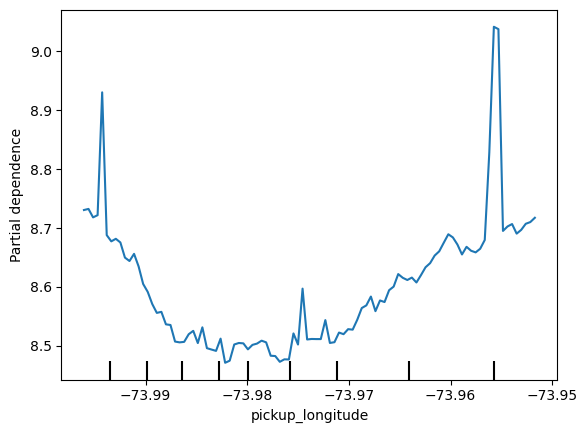

In [26]:
# create new features
taxi_data['abs_lon_change'] = abs(taxi_data.dropoff_longitude - taxi_data.pickup_longitude)
taxi_data['abs_lat_change'] = abs(taxi_data.dropoff_latitude - taxi_data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = taxi_data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

feat_name = 'pickup_longitude'
disp = PartialDependenceDisplay.from_estimator(second_model, new_val_X, [feat_name])
plt.show()

The difference is that the partial dependence plot became smaller. Both plots have a lowest vertical value of 8.5. But, the highest vertical value in the top chart is around 10.7, and the highest vertical value in the bottom chart is below 9.1. In other words, once you control for absolute distance traveled, the pickup_longitude has a smaller impact on predictions.


**Consider a scenario where you have only 2 predictive features, which we will call `feat_A` and `feat_B`. Both features have minimum values of -1 and maximum values of 1. The partial dependence plot for `feat_A` increases steeply over its whole range, whereas the partial dependence plot for feature B increases at a slower rate (less steeply) over its whole range.**

**Does this guarantee that feat_A will have a higher permutation importance than `feat_B`. Why or why not?**

No. This doesn't guarantee `feat_a` is more important. For example, `feat_a` could have a big effect in the cases where it varies, but could have a single value 99% of the time. In that case, permuting `feat_a` wouldn't matter much, since most values would be unchanged.

The code cell below does the following:

1. Creates two features, `X1` and `X2`, having random values in the range [-2, 2].
2. Creates a target variable `y`, which is always 1.
3. Trains a `RandomForestRegressor` model to predict `y` given `X1` and `X2`.
4. Creates a PDP plot for `X1` and a scatter plot of `X1` vs. `y`.

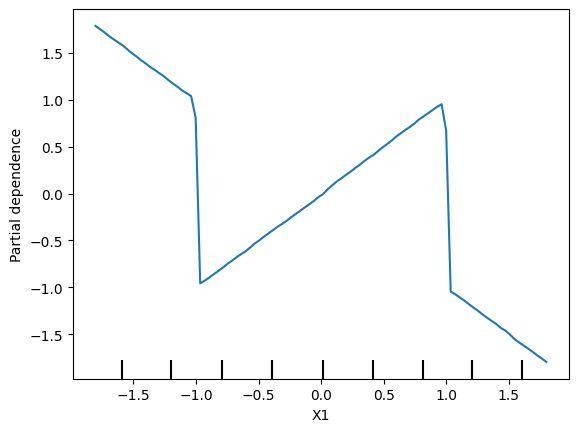

In [27]:
import numpy as np
from numpy.random import rand

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2

# Your code here
y = -2 * X1 * (X1<-1) + X1 - 2 * X1 * (X1>1) - X2
# create dataframe 
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)
disp = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'])
plt.show()

Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high. We will use a RandomForest for the model.

Note: You only need to supply the lines that create the variables X1, X2 and y. The code to build the model and calculate insights is provided.

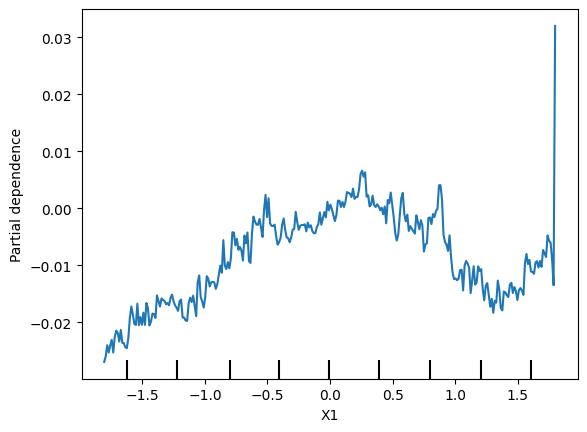

Weight,Feature
2.0078 ± 0.0406,X2
2.0049 ± 0.0435,X1


In [32]:
n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X in the expression for y
y = X1 * X2

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


disp = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'], grid_resolution=300)
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm, feature_names = ['X1', 'X2'])